In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


import functions
import old_relations,new_relations

In [ ]:
low_scatter_para=['ETG','T-type','Bar', 'Disk', 'Ring', 'Core', 'Multiple', 'Compactness', 'AGN',
       'Pseudobulge', 'BCG', 'cD','M*_sph', 'M*_gal', 'log_B/T',
       'log_sigma0', 'log_R_e_sph_maj','log_R_e_sph_eq_kpc', 'log_n_sph_maj', 'log_n_sph_eq', 'log(I_e,sph,maj/M_Sun/pc^2)',
       'log(I_e,sph,eq/M_Sun/pc^2)', 'Concentration_Index',
       'avg_Rho_1kpc_Exact_All', 'r1_density_approx', 'log10(R10_kpc)',
       'logRho_R10_approx', 'log_rho10_Exact', 'log10(R90_kpc)',
       'logRho_R90_approx', 'log_rho_90_Exact_all', 'Rho_re_spatial',
       'SR_pc_All', 'Rho_SR_pc_All', 'CR_def1_approx_new',
       'Rho_cr_def1_approx_new', 'CR_def2_approx_new',
       'Rho_CR_def2_approx_new', 'Sr(pc)_2_using_Falserm_drho',
       'Log_Approx_Avg_density_10pc', 'log_Rho_e_Exact_new',
       'logRho_e_approx_New', 'logRho_soi_approx_new',
       'log_Rho_soi_exact_new', 'Avg_Rho_Re_Exact_all',
       'Avg_Rho_soi_exact_all', 'Avg_Rho_re_Exact_all', 'Rho_re_Exact_all',
       'Rho_r_soi_2BH_approx', 'Log_Avg_Rho_10kpc_approx',
       'Log_Avg_Rho_10kpc_exact_final', 'Log_Avg_Rho_100pc_approx',
       'Log_Avg_Rho_5kpc_approx', 'Log_Avg_rho_5kpc_exact_all', 'ube', 'bve',
       'dc', 'bvtc', 'bri25', 'mabs', 'blum', 'logblum', 'logSigma0sph',
       'LogSigma0', 'R10', 'logR10', 'logR10phi', 'Rh', 'logRh', 'logRhphi',
       'logHalo','M_BH']
low_scatter_para.append('M_BH_std')

In [32]:
PySR_relations = {'name':[],'RMSE':[],'complexity':[],'function':[]}
literature_relations = {'name':[],'RMSE':[],'complexity':[],'function':[]}

In [56]:
literature_relations['name']=['$M-\sigma$','$M-(B/T)$','$M-R_e$',r'$M-\rho_{soi}$',
                       '$M-\sigma_e-R_e$','$M-M^*-R_e$','$M-L_K-R_e$','$M-L_R-L_X$']

literature_relations['RMSE']=np.array([0.46,0.57,0.59,0.71,
                                       0.49*1.5,0.52*1.5,0.57*1.5,0.96*1.5])

literature_relations['complexity']=np.array([5,5,5,5,
                                             9,9,9,9])

In [78]:
PySR_relations['name']=['8.25',
                        '$\log M_{sph}^*-2.36$',
                        '$3.91 \log \sigma_0 + \log M_{sph}$',
                        r'$4.15 \log \sigma_0 - 0.42 \log \rho_{soi}$',
                        r'$M-\sigma-(B/T)-\rho_{soi}$',
                        r'$M-R_{10}-R_{90}-\rho_{soi}$',
                        r'$M-M_{sph}^*-I_e-\rho_{soi}-\rho_{100pc}$',
                        r'$M-M_{sph}^*-I_e-\rho_{soi}-\rho_{10pc}-\rho_{5pc}$']


PySR_relations['RMSE']=np.array([0.9172014405196003,0.41,0.35,0.28,0.23,0.208,0.183,0.207])

PySR_relations['complexity']=np.array([1,3,5,7,11,17,17,19])

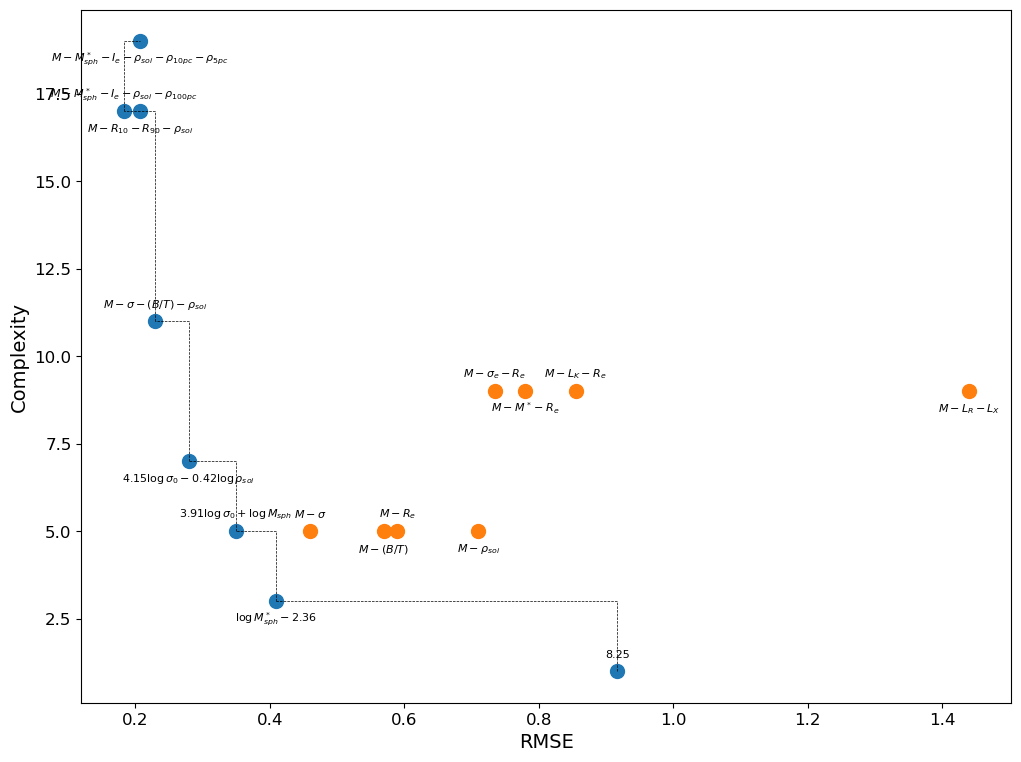

In [82]:
plt.figure(figsize=(12, 9))  # increase the figure size
plt.scatter(PySR_relations['RMSE'], PySR_relations['complexity'], s=100)

for i in range(len(PySR_relations['name'])):
    if i % 2 == 0:
        plt.annotate(PySR_relations['name'][i], (PySR_relations['RMSE'][i], PySR_relations['complexity'][i]), xytext=(0, 10), textcoords='offset points', ha='center', fontsize=8)
    else:
        plt.annotate(PySR_relations['name'][i], (PySR_relations['RMSE'][i], PySR_relations['complexity'][i]), xytext=(0, -15), textcoords='offset points', ha='center', fontsize=8)

# connect the points with stairs
for i in range(len(PySR_relations['name']) - 1):
    plt.plot([PySR_relations['RMSE'][i], PySR_relations['RMSE'][i + 1]], [PySR_relations['complexity'][i+1], PySR_relations['complexity'][i+1]], 'k--', linewidth=0.5)
    plt.plot([PySR_relations['RMSE'][i], PySR_relations['RMSE'][i]], [PySR_relations['complexity'][i], PySR_relations['complexity'][i + 1]], 'k--', linewidth=0.5)




plt.scatter(literature_relations['RMSE'], literature_relations['complexity'], s=100)
for i in range(len(literature_relations['name'])):
    if i % 2 == 0:
        plt.annotate(literature_relations['name'][i], (literature_relations['RMSE'][i], literature_relations['complexity'][i]), xytext=(0, 10), textcoords='offset points', ha='center', fontsize=8)  # decrease the font size of the annotations
    else:
        plt.annotate(literature_relations['name'][i], (literature_relations['RMSE'][i], literature_relations['complexity'][i]), xytext=(0, -15), textcoords='offset points', ha='center', fontsize=8)  # decrease the font size of the annotations

plt.xlabel('RMSE', fontsize=14)  # increase the font size of the x label
plt.ylabel('Complexity', fontsize=14)  # increase the font size of the y label
plt.tick_params(labelsize=12)  # increase the font size of the ticks
